In [1]:
# SURF Light Specturms for Radioactive Sources, PMT UVB Full Spectrum


%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize 
from scipy import stats
from scipy.optimize import curve_fit
import math

In [3]:
def alldata(file):
    '''This function takes data from a file and outputs the columns into two lists. 
    The file must have two columns of data seperated by a tab'''
    point = []
    num = ''
    first = ''
    second = ''
    x = []
    y = []
    f = open(file, 'r')
    f.readline()
    for line in f:
        num = ''
        point = list(line)
        for i in range(len(point)):
            if point[0] == '\t':
                del point[0]
                first = num
                break
            else: 
                num += point[0]
                del point[0]
        num = ''
        for i in range(len(point)):
            if point[0] == '\t':
                del point[0]
                second = num
                break
            else: 
                num += point[0]
                del point[0]
        x.append(float(first))
        y.append(float(second))
    return x, y
  

In [4]:
alldata('Na2214.txt')

([1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  21.0,
  22.0,
  23.0,
  24.0,
  25.0,
  26.0,
  27.0,
  28.0,
  29.0,
  30.0,
  31.0,
  32.0,
  33.0,
  34.0,
  35.0,
  36.0,
  37.0,
  38.0,
  39.0,
  40.0,
  41.0,
  42.0,
  43.0,
  44.0,
  45.0,
  46.0,
  47.0,
  48.0,
  49.0,
  50.0,
  51.0,
  52.0,
  53.0,
  54.0,
  55.0,
  56.0,
  57.0,
  58.0,
  59.0,
  60.0,
  61.0,
  62.0,
  63.0,
  64.0,
  65.0,
  66.0,
  67.0,
  68.0,
  69.0,
  70.0,
  71.0,
  72.0,
  73.0,
  74.0,
  75.0,
  76.0,
  77.0,
  78.0,
  79.0,
  80.0,
  81.0,
  82.0,
  83.0,
  84.0,
  85.0,
  86.0,
  87.0,
  88.0,
  89.0,
  90.0,
  91.0,
  92.0,
  93.0,
  94.0,
  95.0,
  96.0,
  97.0,
  98.0,
  99.0,
  100.0,
  101.0,
  102.0,
  103.0,
  104.0,
  105.0,
  106.0,
  107.0,
  108.0,
  109.0,
  110.0,
  111.0,
  112.0,
  113.0,
  114.0,
  115.0,
  116.0,
  117.0,
  118.0,
  119.0,
  120.0,
  121.0,
  122.0,
  123.0,
 

In [5]:
def alldata2(file):
    '''Takes a text file and categorizes the data into two arrays based off of
    columns. Outputs two arrays, one for x and one for y'''
    data = np.genfromtxt(file)
    x = data[0]
    y = data[1]
    return x, y

In [6]:
def energy(x, y, upper, lower):
    ''' This function takes two lists and two integers and outputs two lists
    within the integer bounds. The bounds are determined by the x variable''' 
    g = 0
    newx = []
    newy = []
    for i in range(len(x)):
        if x[g] > lower:
                if x[g] < upper:
                    newx.append(x[g])
                    newy.append(y[g])
        g += 1
    return newx, newy

In [7]:
def rawdata(x, y, title, xname, yname, legend):
    ''' This function takes two lists and graphing information and plots the 
    lists against eachother'''
    plt.plot(x, y, label = legend)
    plt.title(title)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.legend()
    plt.show()

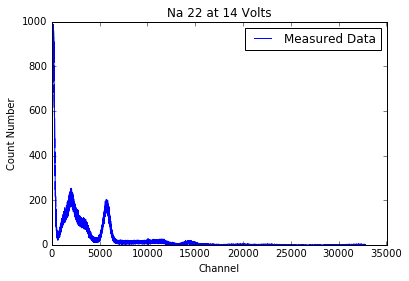

In [8]:
rawdata(alldata('Na2214.txt')[0], 
        alldata('Na2214.txt')[1], 'Na 22 at 14 Volts', 'Channel', 'Count Number', 'Measured Data')

In [9]:
def bestfit(x, y):
    ''' This function takes two lists and finds the line of bestfit'''
    best = np.polyfit(x, y, 2, full = True)
    plt.plot(x, np.poly1d(np.polyfit(x, y, 2))(x))
    return best

In [10]:
def poly(guess):
    '''This is a polynomial chi squared sum. The argument requires a list of
    three variables and x and y lists must be defined outside of the function
    in the porgram'''
    arx = np.asarray(x1)
    ary = np.asarray(y1)
    return sum(np.power(guess[0]*np.power(arx, 2) + guess[1]*arx + guess[2] - ary, 2))

In [11]:
def gauss(guess):
    '''This is a gaussian chi squared sum. The argument requires a list of
    three variables and x and y lists must be defined outside of the function
    in the porgram'''
    arx = np.asarray(x1)
    ary = np.asarray(y1)
    return sum(np.power(guess[0]*np.exp(-np.power((arx-guess[1]), 2)/(2*np.power(guess[2], 2))) + guess[3]*arx + guess[4] - ary, 2))   

In [12]:
def optimize(f, guess):
    '''Takes a function and potential parameters and outputs the minimized 
    values for the guess'''
    fit = minimize(f, guess, method= 'Nelder-Mead', bounds = ((0, None), (0, None), (0, None), (None, 0), (0, None)))
    return fit   

In [13]:
def linefitpoly(opt, x, title, xname, yname, legend):
    ''' This plots the line of best fit from the optimize function for a 
    ploynomial'''
    ans = list(opt.x)
    ct = 0
    y = []
    for i in x:
        y.append(ans[0]*np.power(x[ct], 2) + ans[1]*x[ct] + ans[2])
        ct += 1
    plt.plot(x, y, label = legend)
    plt.title(title)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.legend()
    plt.show()

In [14]:
def linefitgauss(opt, x, title, xname, yname, legend):
    ''' This plots the line of best fit from the optimize function for a 
    ploynomial'''
    ans = list(opt.x)
    i = 0
    y = []
    for i in x:
        y.append(ans[0]*np.exp(-np.power((i-ans[1]), 2)/(2*np.power(ans[2], 2)))+ ans[3]*i + ans[4])
    plt.plot(x, y)
    plt.plot(x, y, label = legend)
    plt.title(title)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.legend()
    plt.show()

In [15]:
def linefitgaussRn(opt, x, title, xname, yname, legend):
    ''' This plots the line of best fit from the optimize function for a 
    ploynomial'''
    ans = list(opt.x)
    i = 0
    y = []
    for i in x:
        y.append(ans[0]*np.exp(-np.power((i-ans[1]), 2)/(2*np.power(ans[2], 2)))+\
            ans[3]*np.exp(-np.power((i-ans[4]), 2)/(2*np.power(ans[5], 2))) +\
            ans[6]*np.exp(-np.power((i-ans[7]), 2)/(2*np.power(ans[8], 2)))+ ans[9]*i + ans[10])
    plt.plot(x, y)
    plt.plot(x, y, label = legend)
    plt.title(title)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.legend()
    plt.show() 

In [16]:
def gaussRn(guess):
    '''This is a gaussian chi squared sum. The argument requires a list of
    three variables and x and y lists must be defined outside of the function
    in the porgram'''
    arx = np.asarray(x1)
    ary = np.asarray(y1)
    return sum(np.power(guess[0]*np.exp(-np.power((arx-guess[1]), 2)/(2*np.power(guess[2], 2)))\
        + guess[3]*np.exp(-np.power((arx-guess[4]), 2)/(2*np.power(guess[5], 2))) + \
        guess[6]*np.exp(-np.power((arx-guess[7]), 2)/(2*np.power(guess[8], 2))) + arx*guess[9] + guess[10] - ary, 2))

In [17]:
def resolution(opt):
    '''This finds the resolution of the fit using the width, standard deviation
    and the center, the mean'''
    values = list(opt.x)
    return values[2]/values[1]

In [18]:
def conversion(opt, y):
    '''Automated Line of Best Fit for gamma and electron sources'''
    y = []
    x = []
    rawx =[]
    for i in opt:
        rawx.append(i)
    for i in rawx:
        x.append(i[1])
    for i in y:
        y.append(i)
    plt.errorbar(x, y, xerr = (opt[0][0], opt[1][0], opt[2][0]))
    plt.scipy.stats.linregress(x, y)
    plt.show()

In [19]:
i = 11
j = 50  
guessregress = [i, j]  
def line(x, i, j):
    ''' A linear function'''
    return i*x + j   

In [20]:
def chan_kev():
    '''By replacing the x, y, and err values the function plots the points with
    their error and plots the line of bestfit'''
    x = [60, 511, 662, 1170, 1274, 1330]
    y = [702.5, 5738.7, 7425.6, 11826.8, 14363.2, 13681.8]
    err = [129.9, 325.4, 368.3, 790.2, 398.9, 421]
    names = [' ', 'Na-22 First  ', 'Cs-137  ', 'Co-60 First  ', 'Na-22 Second  ', 'Co-60 Second  ']
    first = ['  AmBe-241']
    yfit = []
    linfit = curve_fit(line, x, y, guessregress, sigma = err)
    for i in range(1400):
        yfit.append(i*linfit[0][0] + linfit[0][1])
    plt.errorbar(x, y, yerr= err, linestyle = 'None', marker = 'o', label = 'Raw Data Points')
    plt.plot(range(1400), yfit, label = 'Line of Best Fit')
    plt.ylim(-100, 17000)
    plt.title('Channel to Kev Count for Four Radioactive Sources')
    plt.xlabel('KeV')
    plt.ylabel('Channels (ADC)')
    plt.legend(loc = 2)
    
    for i, txt in enumerate(names):
        plt.annotate(txt, (x[i],y[i]), ha = 'right')
        plt.show()
    for i, txt in enumerate(first):
        plt.annotate(txt, (x[i], y[i]), ha = 'left')
        plt.show()
    plt.show()    
    print linfit

In [21]:
def radium():
    '''x represents the known keV values for the Ra impurities and y represents 
    the measured values in channels. This function outputs the quenching factor 
    for each measurement'''
    known = [4800, 5500, 6000, 7700]
    measured = [14721.6, 17577.5, 20210.9, 28612.8]
    error1 = [988.1, 657.6, 882.8, 723.2]
    error2 = []
    names = ['Ra-226    ', 'Ra-222    ', 'Po-218   ', 'Po-214    ']
    coun = 0
    tick = 0
    quench = []
    yfit = []
    for i in measured:
        pred = i*.085
        quench.append(known[coun]/pred)
        coun += 1
    linfit = stats.linregress(known, quench)
    for i in range(8000):
        yfit.append(i*linfit[0] + linfit[1])
    for i in error1:
        exper = measured[tick]
        recor = known[tick]
        error2.append((i*recor)/(math.pow(exper, 2)))
        tick += 1
    plt.plot(range(8000), yfit, label = 'Line of Best Fit')
    plt.xlim(4000, 8000)
    plt.errorbar(known, quench, yerr = error2, marker = 'o', linestyle = 'None', label = 'Quenching Factor')
    plt.title('Quenching Factor at Various Energies for Ra 224 in BaF2')
    plt.xlabel('Energy in keV')
    plt.ylabel('Quenching Factor')
    plt.legend(loc = 1)
    for i, txt in enumerate(names):
        plt.annotate(txt, (known[i],quench[i]), ha = 'right')
        plt.show()
    plt.show()
    return error2

In [22]:
a = -.000001
b = .2
c = -1600
para = [a, b, c]
d = 400
e = 7000
f = 2000
g = 10
h = -.0001
hyp = [d, e, f, g, h]
threepeaks = [40, 14000, 1000, 40, 17000, 1000, 40, 20000, 1000, 0, 0]
x1 = energy(alldata('Cs13714.txt')[0], alldata('Cs13714.txt')[1], 9000, 6000)[0]
y1 = energy(alldata('Cs13714.txt')[0], alldata('Cs13714.txt')[1], 9000, 6000)[1]         
fitted = optimize(gauss, hyp)
rawdata(x1, y1, 'Cs 137', 'Energy', 'Counts', 'Collected Data (Observed)')
linefitgauss(fitted, x1, 'Cs 137', 'Energy', 'Counts', 'Gaussian Fit to Data')
print resolution(fitted)



    
    


    

IOError: [Errno 2] No such file or directory: 'Cs13714.txt'

In [ ]:
d = 2000
e = 700
f = 1000
g = 10
h = -.0001
hyp = [d, e, f, g, h]
threepeaks = [40, 14000, 1000, 40, 17000, 1000, 40, 20000, 1000, 0, 0]
x1 = energy(alldata('AmBe24114.txt')[0], alldata('AmBe24114.txt')[1], 1200, 200)[0]
y1 = energy(alldata('AmBe24114.txt')[0], alldata('AmBe24114.txt')[1], 1200, 200)[1]         
fitted = optimize(gauss, hyp)
rawdata(x1, y1, 'AmBe 241', 'Energy', 'Counts', 'Collected Data (Observed)')
linefitgauss(fitted, x1, 'AmBe 241', 'Energy', 'Counts', 'Gaussian Fit to Data')
print resolution(fitted)

In [ ]:
d = 700
e = 12200
f = 1000
g = 0
h = -.0001
hyp = [d, e, f, g, h]
threepeaks = [40, 14000, 1000, 40, 17000, 1000, 40, 20000, 1000, 0, 0]
x1 = energy(alldata('Co60142.txt')[0], alldata('Co60142.txt')[1], 13000, 11400)[0]
y1 = energy(alldata('Co60142.txt')[0], alldata('Co60142.txt')[1], 13000, 11400)[1]         
fitted = optimize(gauss, hyp)
rawdata(x1, y1, 'Co 60 Peak 1', 'Energy', 'Counts', 'Collected Data (Observed)')
linefitgauss(fitted, x1, 'Co 60 Peak 1', 'Energy', 'Counts', 'Gaussian Fit to Data')
print resolution(fitted)

In [ ]:
d = 700
e = 12200
f = 1000
g = 0
h = -.0001
hyp = [d, e, f, g, h]
threepeaks = [40, 14000, 1000, 40, 17000, 1000, 40, 20000, 1000, 0, 0]
x1 = energy(alldata('Co60142.txt')[0], alldata('Co60142.txt')[1], 15000, 13000)[0]
y1 = energy(alldata('Co60142.txt')[0], alldata('Co60142.txt')[1], 15000, 13000)[1]         
fitted = optimize(gauss, hyp)
rawdata(x1, y1, 'Co 60 Peak 2', 'Energy', 'Counts', 'Collected Data (Observed)')
linefitgauss(fitted, x1, 'Co 60 Peak 2', 'Energy', 'Counts', 'Gaussian Fit to Data')
print resolution(fitted)

In [ ]:
d = 200
e = 5750
f = 1000
g = 0
h = -.0001
hyp = [d, e, f, g, h]
threepeaks = [40, 14000, 1000, 40, 17000, 1000, 40, 20000, 1000, 0, 0]
x1 = energy(alldata('Na2214.txt')[0], alldata('Na2214.txt')[1], 7000, 4500)[0]
y1 = energy(alldata('Na2214.txt')[0], alldata('Na2214.txt')[1], 7000, 4500)[1]         
fitted = optimize(gauss, hyp)
rawdata(x1, y1, 'Na 22 Peak 1', 'Energy', 'Counts', 'Collected Data (Observed)')
linefitgauss(fitted, x1, 'Na 22 Peak 1', 'Energy', 'Counts', 'Gaussian Fit to Data')
print resolution(fitted)

In [ ]:
d = 20
e = 14500
f = 2000
g = 0
h = -.0001
hyp = [d, e, f, g, h]
threepeaks = [40, 14000, 1000, 40, 17000, 1000, 40, 20000, 1000, 0, 0]
x1 = energy(alldata('Na2214.txt')[0], alldata('Na2214.txt')[1], 16000, 13000)[0]
y1 = energy(alldata('Na2214.txt')[0], alldata('Na2214.txt')[1], 16000, 13000)[1]         
fitted = optimize(gauss, hyp)
rawdata(x1, y1, 'Na 22 Peak 2', 'Energy', 'Counts', 'Collected Data (Observed)')
linefitgauss(fitted, x1, 'Na 22 Peak 2', 'Energy', 'Counts', 'Gaussian Fit to Data')
print resolution(fitted)

In [ ]:
d = 20
e = 14500
f = 2000
g = 0
h = -.0001
hyp = [d, e, f, g, h]
threepeaks = [40, 14000, 1000, 40, 17000, 1000, 40, 20000, 1000, 0, 0]
x1 = energy(alldata('Ra224142.txt')[0], alldata('Ra224142.txt')[1], 22000, 13000)[0]
y1 = energy(alldata('Ra224142.txt')[0], alldata('Ra224142.txt')[1], 22000, 13000)[1]         
fitted = optimize(gaussRn, threepeaks)
rawdata(x1, y1, 'Ra 224 First Three Peaks', 'Energy', 'Counts', 'Collected Data (Observed)')
linefitgaussRn(fitted, x1, 'Ra 224 First Three Peaks', 'Energy', 'Counts', 'Gaussian Fit to Data')
print resolution(fitted)

In [ ]:
d = 40
e = 28500
f = 5000
g = 0
h = -.0001
hyp = [d, e, f, g, h]
threepeaks = [40, 14000, 1000, 40, 17000, 1000, 40, 20000, 1000, 0, 0]
x1 = energy(alldata('Ra224142.txt')[0], alldata('Ra224142.txt')[1], 31000, 26000)[0]
y1 = energy(alldata('Ra224142.txt')[0], alldata('Ra224142.txt')[1], 31000, 26000)[1]         
fitted = optimize(gauss, hyp)
rawdata(x1, y1, 'Ra 224 Fourth Peak', 'Energy', 'Counts', 'Collected Data (Observed)')
linefitgauss(fitted, x1, 'Ra 224 Fourth Peak', 'Energy', 'Counts', 'Gaussian Fit to Data')
print resolution(fitted)